In [31]:
#Importamos Librearias


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [24]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "6"  # Cambiá "2" al número de núcleos que quieras usar


In [2]:
#Cargamos DataSet

df = pd.read_csv(r"C:\Users\chris\OneDrive\Documentos\CoderHouse\Data Science II Machine Learning para la Ciencia de Datos\Proyecto\datos-fallecidos-en-siniestros-de-trnsito-2013-2019.csv", encoding="latin1", delimiter=";")
df

,Fecha y hora,Fecha,Hora,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Lugar del Siniestro,X,Y
0,01/01/2013 23:15,01/01/2023,23:15,CANELONES,N/C,NACIONAL,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34.0,F,0,NaN,RUTA 101 km 24,"589815,34","6143862,76"
1,01/01/2013 23:35,01/01/2013,23:35,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATàN,PEATàN,PEATàN,52.0,F,0,MOTO,MAGALLANES pr¢x. Barrio Chinchurreta,"411579,77","6526872,77"
2,03/01/2013 23:35,03/01/2013,23:35,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34.0,M,8,CAMION,RUTA 3 km. 358,"412321,54","6407067,58"
3,04/01/2013 7:10,04/01/2013,07:10,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49.0,F,1,NaN,RUTA 21 esq. Dr Irastorza,"379424,37","6240356,26"
4,04/01/2013 11:00,04/01/2013,11:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91.0,M,0,NaN,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,"570675,1","6164479,53"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,23.0,F,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3473,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,5.0,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3474,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,23.0,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3475,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,CAMIONETA,PASAJERO,60.0,F,27,AUTO,"RUTA 24 KM 88,000","405112,07","6404241,81"


In [3]:
# Mostrar las primeras filas del dataset para entender la estructura
df.head()

,Fecha y hora,Fecha,Hora,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Lugar del Siniestro,X,Y
0,01/01/2013 23:15,01/01/2023,23:15,CANELONES,N/C,NACIONAL,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34.0,F,0,NaN,RUTA 101 km 24,"589815,34","6143862,76"
1,01/01/2013 23:35,01/01/2013,23:35,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATàN,PEATàN,PEATàN,52.0,F,0,MOTO,MAGALLANES pr¢x. Barrio Chinchurreta,"411579,77","6526872,77"
2,03/01/2013 23:35,03/01/2013,23:35,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34.0,M,8,CAMION,RUTA 3 km. 358,"412321,54","6407067,58"
3,04/01/2013 7:10,04/01/2013,07:10,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49.0,F,1,NaN,RUTA 21 esq. Dr Irastorza,"379424,37","6240356,26"
4,04/01/2013 11:00,04/01/2013,11:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91.0,M,0,NaN,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,"570675,1","6164479,53"


In [4]:
# Paso 2: Exploración Inicial del Dataset
# Cantidad de filas y columnas
print("Cantidad de filas y columnas:", df.shape)


Cantidad de filas y columnas: (3477, 16)


In [5]:
# Información general del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha y hora          3477 non-null   object 
 1   Fecha                 3477 non-null   object 
 2   Hora                  3477 non-null   object 
 3   Departamento          3477 non-null   object 
 4   Localidad             3477 non-null   object 
 5   Jurisdiccion          3477 non-null   object 
 6   Tipo de Siniestro     3477 non-null   object 
 7   Vehiculo              3477 non-null   object 
 8   Rol                   3477 non-null   object 
 9   Edad                  3433 non-null   float64
 10  Sexo                  3476 non-null   object 
 11  Fallecido a los Dias  3477 non-null   int64  
 12  Otro vehiculo         2405 non-null   object 
 13  Lugar del Siniestro   3477 non-null   object 
 14  X                     3476 non-null   object 
 15  Y                    

In [6]:
# Verificación de valores nulos
print("\nValores nulos por columna:\n", df.isnull().sum())



Valores nulos por columna:
 Fecha y hora               0
Fecha                      0
Hora                       0
Departamento               0
Localidad                  0
Jurisdiccion               0
Tipo de Siniestro          0
Vehiculo                   0
Rol                        0
Edad                      44
Sexo                       1
Fallecido a los Dias       0
Otro vehiculo           1072
Lugar del Siniestro        0
X                          1
Y                          1
dtype: int64


In [8]:
#Relleno los valores Nulos de 'Edad' con el Promedio de Edad

df['Edad'] = df['Edad'].fillna(df['Edad'].mean())  # Promedio

#Verifico datos Nulos
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora               0
Fecha                      0
Hora                       0
Departamento               0
Localidad                  0
Jurisdiccion               0
Tipo de Siniestro          0
Vehiculo                   0
Rol                        0
Edad                       0
Sexo                       1
Fallecido a los Dias       0
Otro vehiculo           1072
Lugar del Siniestro        0
X                          1
Y                          1
dtype: int64


In [9]:
#Como los valores nulos de 'Otro Vehiculo' se deben a que no hay 'otro vehiculo' o es desconocido, los suplanto con un valor fijo.

df['Otro vehiculo'] = df['Otro vehiculo'].fillna('Sin Dato')

#Verifico datos Nulos
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora            0
Fecha                   0
Hora                    0
Departamento            0
Localidad               0
Jurisdiccion            0
Tipo de Siniestro       0
Vehiculo                0
Rol                     0
Edad                    0
Sexo                    1
Fallecido a los Dias    0
Otro vehiculo           0
Lugar del Siniestro     0
X                       1
Y                       1
dtype: int64


In [11]:
# Dado que ahora los valores nulos son muy escasos, los elimino.

df = df.dropna(subset=['Sexo'])
df = df.dropna(subset=['X'])
df = df.dropna(subset=['Y'])

#Verifico datos Nulos
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora            0
Fecha                   0
Hora                    0
Departamento            0
Localidad               0
Jurisdiccion            0
Tipo de Siniestro       0
Vehiculo                0
Rol                     0
Edad                    0
Sexo                    0
Fallecido a los Dias    0
Otro vehiculo           0
Lugar del Siniestro     0
X                       0
Y                       0
dtype: int64


In [12]:
# Resumen estadístico
print("\nResumen estadístico:\n", df.describe())


Resumen estadístico:
               Edad  Fallecido a los Dias
count  3475.000000           3475.000000
mean     43.175360              1.438273
std      21.141411              3.772744
min       0.000000              0.000000
25%      25.000000              0.000000
50%      41.000000              0.000000
75%      60.000000              1.000000
max      96.000000             30.000000


In [13]:
# Limpieza de Datos
# Eliminar columnas irrelevantes si las hay
# Eliminar duplicados

df = df.drop_duplicates()

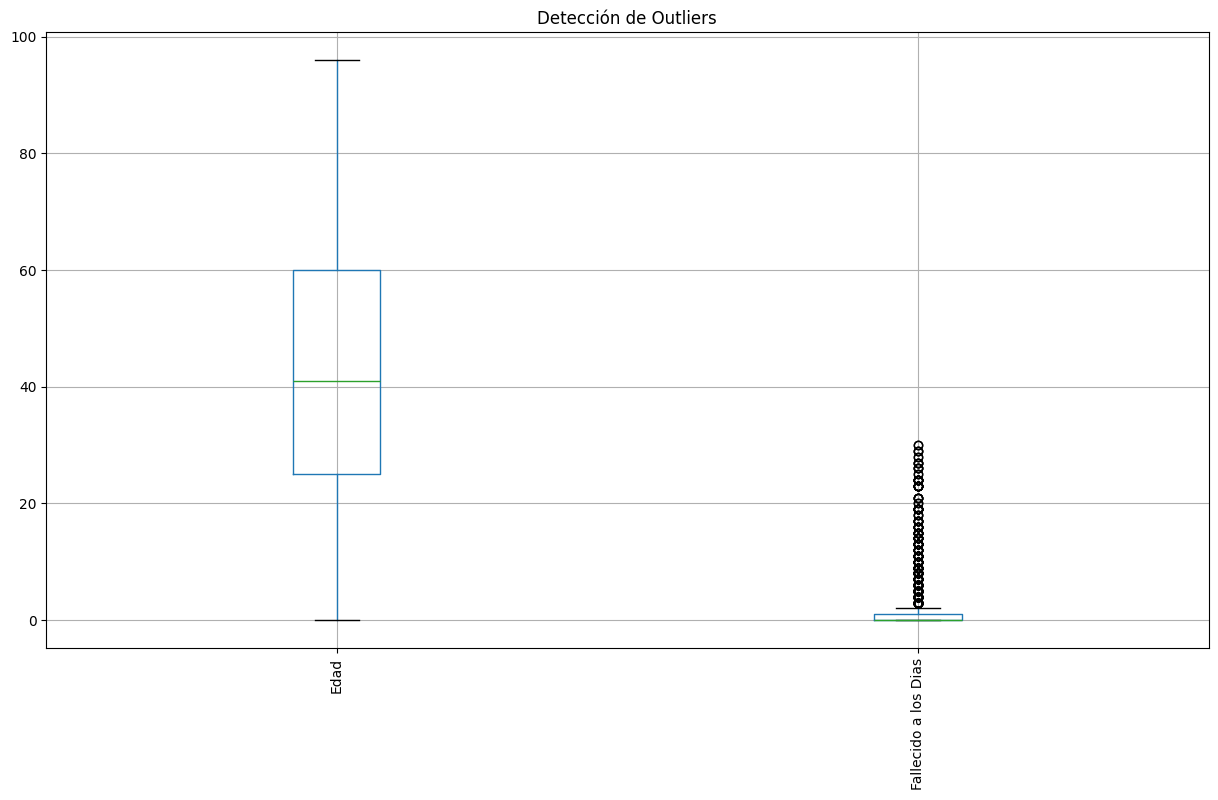

In [14]:
# Detección de Outliers
# Visualización de outliers usando boxplots

plt.figure(figsize=(15, 8))
df.boxplot()
plt.title("Detección de Outliers")
plt.xticks(rotation=90)
plt.show()

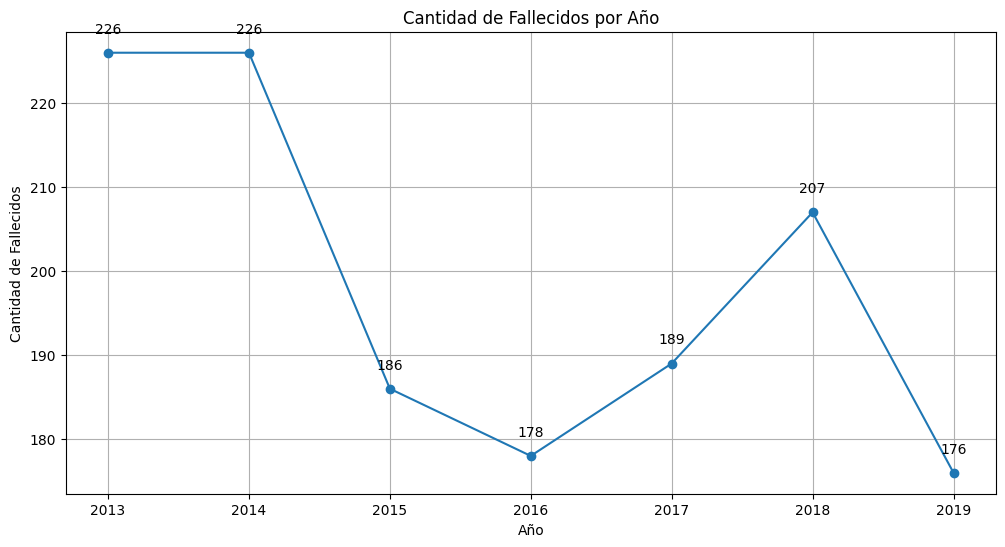

In [15]:
# Análisis Visual del Dataset
# Cantidad total de fallecidos por año

df['Año'] = pd.to_datetime(df['Fecha y hora'], errors='coerce').dt.year
fallecidos_por_año = df['Año'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(fallecidos_por_año.index, fallecidos_por_año.values, marker='o')
plt.title("Cantidad de Fallecidos por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Fallecidos")
plt.grid(True)
for x, y in zip(fallecidos_por_año.index, fallecidos_por_año.values):
    plt.text(x, y + 2, str(y), fontsize=10, ha='center', va='bottom', color='black')

plt.show()


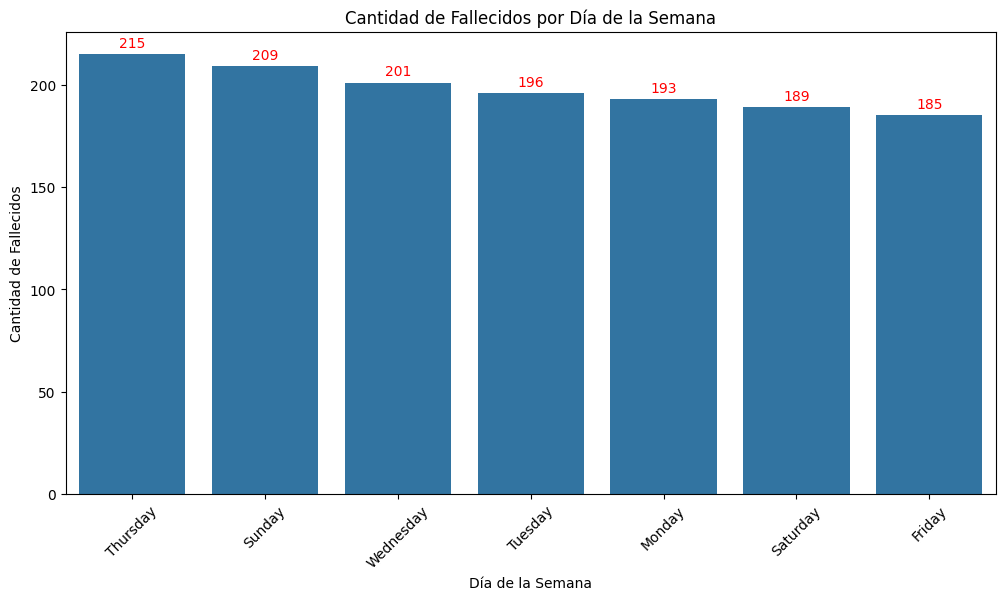

In [16]:
# Cantidad de fallecidos por día de la semana

if 'Fecha y hora' in df.columns:
    df['Día de la Semana'] = pd.to_datetime(df['Fecha y hora'], errors='coerce').dt.day_name()
    fallecidos_por_dia = df['Día de la Semana'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=fallecidos_por_dia.index, y=fallecidos_por_dia.values)
    plt.title("Cantidad de Fallecidos por Día de la Semana")
    plt.xlabel("Día de la Semana")
    plt.ylabel("Cantidad de Fallecidos")
    for i, value in enumerate(fallecidos_por_dia.values):
        plt.text(i, value + 2, str(value), ha='center', va='bottom', color='red')
    plt.xticks(rotation=45)
    plt.show()


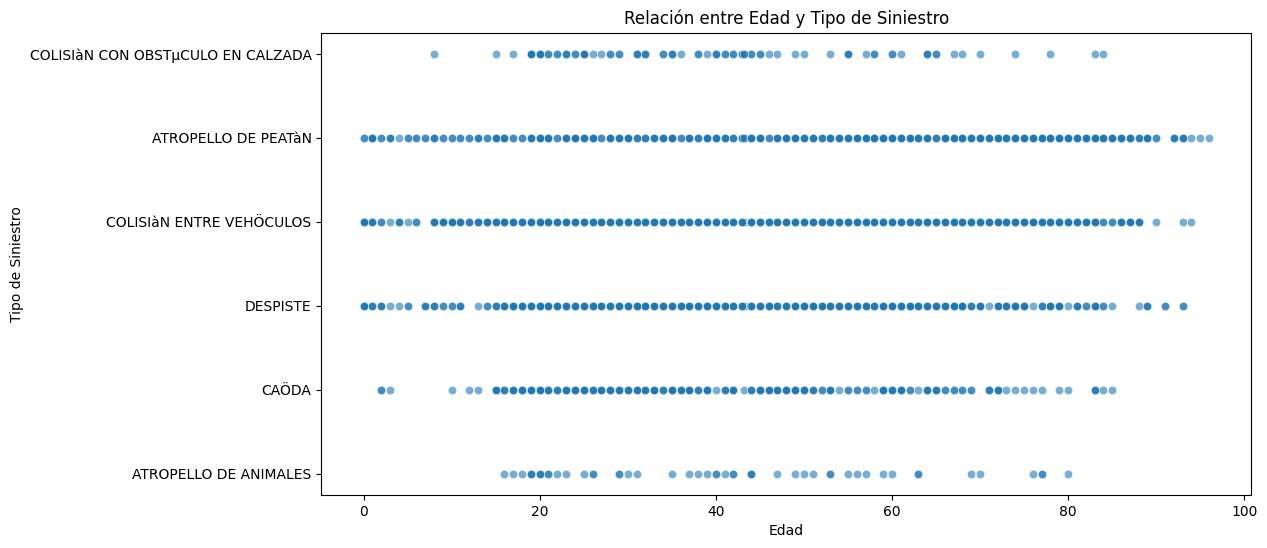

In [17]:
# Relación entre edad y tipo de siniestro

if 'Edad' in df.columns and 'Tipo de Siniestro' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Edad', y='Tipo de Siniestro', alpha=0.6)
    plt.title("Relación entre Edad y Tipo de Siniestro")
    plt.xlabel("Edad")
    plt.ylabel("Tipo de Siniestro")
    plt.show()

El gráfico muestra la relación entre la edad de los fallecidos y el tipo de siniestro en el que estuvieron involucrados. Cada punto representa un fallecido, ubicado según su edad y el tipo de accidente.

✅ Conclusión:
Los siniestros como atropellos de peatones ocurren más en edades avanzadas.
Colisiones entre vehículos y despistes parecen afectar a una amplia gama de edades.
Podría haber un patrón que indique que ciertos tipos de accidentes son más frecuentes en ciertos grupos etarios.

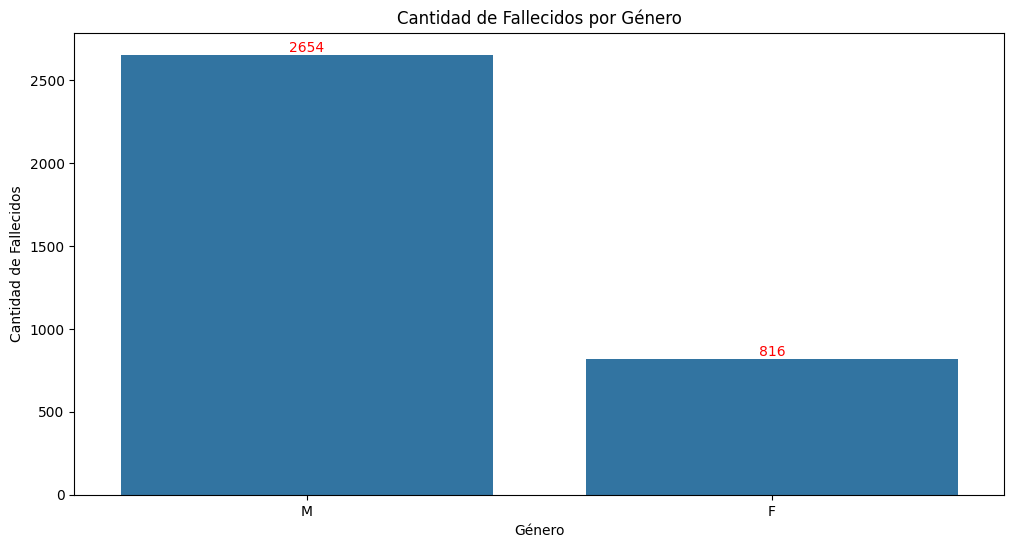

In [18]:
# Comparación de fallecidos por género

if 'Sexo' in df.columns:
    fallecidos_por_genero = df['Sexo'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=fallecidos_por_genero.index, y=fallecidos_por_genero.values)
    plt.title("Cantidad de Fallecidos por Género")
    plt.xlabel("Género")
    plt.ylabel("Cantidad de Fallecidos")
    for i, value in enumerate(fallecidos_por_genero.values):
        plt.text(i, value + 2, str(value), ha='center', va='bottom', color='red')
    plt.show()


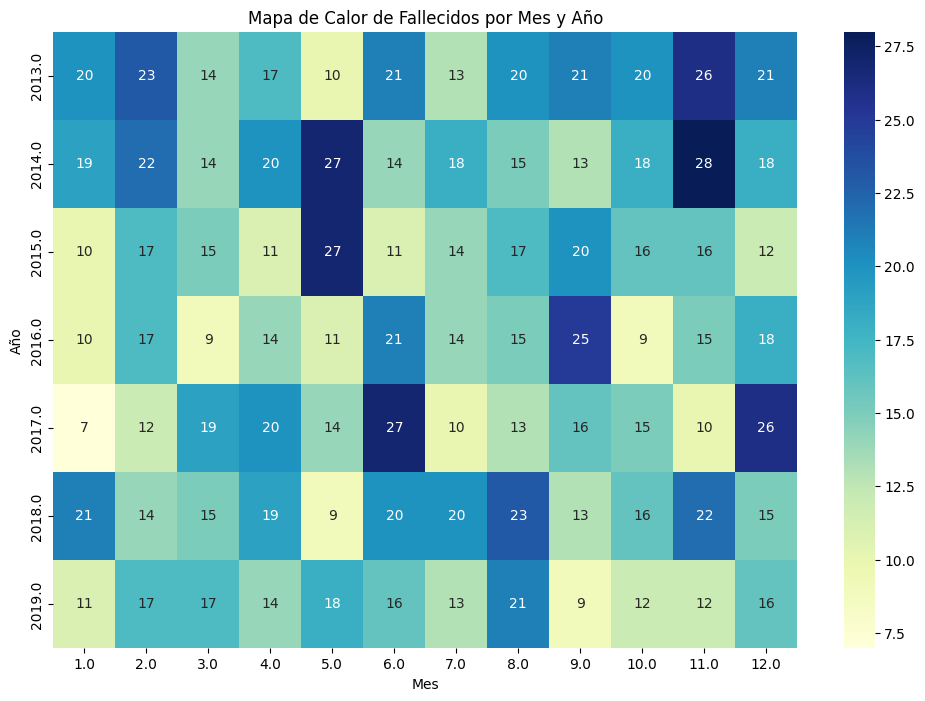

In [19]:
# Mapa de calor temporal (meses vs. años)

if 'Fecha y hora' in df.columns:
    df['Mes'] = pd.to_datetime(df['Fecha y hora'], errors='coerce').dt.month
    heatmap_data = df.groupby(['Año', 'Mes']).size().unstack()
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
    plt.title("Mapa de Calor de Fallecidos por Mes y Año")
    plt.xlabel("Mes")
    plt.ylabel("Año")
    plt.show()

El mapa de calor muestra los meses y años en los que hubo más fallecidos por siniestros de tránsito. Los valores más altos (colores más oscuros) indican los períodos más críticos. Este gráfico es útil para identificar tendencias temporales y planificar campañas de seguridad vial en meses con mayor riesgo.


Edad Promedio de los Fallecidos: 43.21


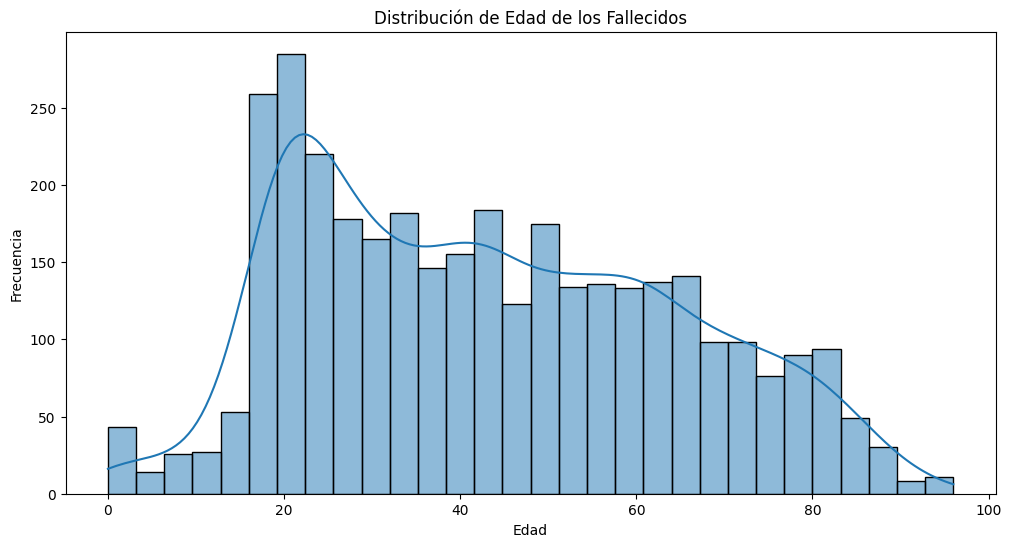

In [20]:
# Edad promedio de los fallecidos

if 'Edad' in df.columns:
    edad_promedio = df['Edad'].mean()
    print("\nEdad Promedio de los Fallecidos:", round(edad_promedio, 2))

    plt.figure(figsize=(12, 6))
    sns.histplot(df['Edad'].dropna(), bins=30, kde=True)
    plt.title("Distribución de Edad de los Fallecidos")
    plt.xlabel("Edad")
    plt.ylabel("Frecuencia")
    plt.show()

El gráfico muestra la distribución de edades de las personas fallecidas en siniestros de tránsito. El eje horizontal representa la edad, mientras que el eje vertical indica la cantidad de fallecidos en cada grupo etario. La línea azul muestra una estimación de densidad.

✅ Conclusión:
La mayoría de los fallecidos están entre los 20 y 40 años, lo que indica que los adultos jóvenes son los más afectados.
También hay un número significativo de fallecidos en edades avanzadas, lo que sugiere que tanto los jóvenes como los adultos mayores son grupos vulnerables.
Este gráfico puede ayudar a enfocar campañas de seguridad vial en los grupos etarios más afectados.

In [21]:
#Reemplazo la coma por punto en las coordenadas

df['X'] = df['X'].str.replace(',', '.').astype(float)
df['Y'] = df['Y'].str.replace(',', '.').astype(float)

In [22]:
#Hago la transformación necesaria pra que se muestre correctamente el grafico
from pyproj import Transformer

# Definir el transformador para la zona UTM 21 Sur (Uruguay)
transformer = Transformer.from_crs("EPSG:32721", "EPSG:4326", always_xy=True)

# Transformar las coordenadas
df['Longitud'], df['Latitud'] = transformer.transform(df['X'].values, df['Y'].values)

# Verificar las nuevas columnas
print(df[['Longitud', 'Latitud']].head())

    Longitud    Latitud
0 -56.017623 -34.843584
1 -57.929977 -31.389354
2 -57.933028 -32.470140
3 -58.305173 -33.970421
4 -56.228685 -34.659193


In [23]:
from pyproj import Proj, transform

# Definir la proyección UTM para la zona 21 Sur (Uruguay)
proj_origen = Proj(proj="utm", zone=21, south=True, ellps="WGS84")
proj_destino = Proj(proj="latlong", ellps="WGS84")

# Transformar coordenadas
df['Longitud'], df['Latitud'] = transform(proj_origen, proj_destino, df['X'].values, df['Y'].values)


C:\Users\chris\AppData\Local\Temp\ipykernel_9300\1638183182.py:8: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  df['Longitud'], df['Latitud'] = transform(proj_origen, proj_destino, df['X'].values, df['Y'].values)


In [24]:
import folium
from folium.plugins import HeatMap

# Crear el mapa base
mapa = folium.Map(location=[df['Latitud'].mean(), df['Longitud'].mean()], zoom_start=7)

# Agregar el mapa de calor con parámetros ajustados
heat_data = df[['Latitud', 'Longitud']].values.tolist()
HeatMap(
    heat_data,
    radius=15,         # Tamaño de los puntos
    blur=10,           # Difuminado de las áreas de calor
    max_zoom=1,        # Nivel máximo de zoom
    min_opacity=0.5    # Transparencia mínima
).add_to(mapa)

# Guardar y mostrar el mapa
mapa.save("mapa_calor_simple.html")
mapa


# Ahora Aplicaremos Diferentes Modelos de Prediccion


In [10]:
df = pd.read_csv(r"C:\Users\chris\OneDrive\Documentos\CoderHouse\Data Science II Machine Learning para la Ciencia de Datos\Proyecto\datos-fallecidos-en-siniestros-de-trnsito-2013-2019.csv", encoding="latin1", delimiter=";")
df

,Fecha y hora,Fecha,Hora,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Lugar del Siniestro,X,Y
0,01/01/2013 23:15,01/01/2023,23:15,CANELONES,N/C,NACIONAL,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34.0,F,0,NaN,RUTA 101 km 24,"589815,34","6143862,76"
1,01/01/2013 23:35,01/01/2013,23:35,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATàN,PEATàN,PEATàN,52.0,F,0,MOTO,MAGALLANES pr¢x. Barrio Chinchurreta,"411579,77","6526872,77"
2,03/01/2013 23:35,03/01/2013,23:35,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34.0,M,8,CAMION,RUTA 3 km. 358,"412321,54","6407067,58"
3,04/01/2013 7:10,04/01/2013,07:10,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49.0,F,1,NaN,RUTA 21 esq. Dr Irastorza,"379424,37","6240356,26"
4,04/01/2013 11:00,04/01/2013,11:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91.0,M,0,NaN,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,"570675,1","6164479,53"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,23.0,F,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3473,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,5.0,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3474,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,23.0,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3475,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,CAMIONETA,PASAJERO,60.0,F,27,AUTO,"RUTA 24 KM 88,000","405112,07","6404241,81"


In [11]:
# Verificación de valores nulos
print("\nValores nulos por columna:\n", df.isnull().sum())


Valores nulos por columna:
 Fecha y hora               0
Fecha                      0
Hora                       0
Departamento               0
Localidad                  0
Jurisdiccion               0
Tipo de Siniestro          0
Vehiculo                   0
Rol                        0
Edad                      44
Sexo                       1
Fallecido a los Dias       0
Otro vehiculo           1072
Lugar del Siniestro        0
X                          1
Y                          1
dtype: int64


In [12]:
#Relleno los valores Nulos de 'Edad' con el Promedio de Edad

df['Edad'] = df['Edad'].fillna(df['Edad'].mean())  # Promedio

#Verifico datos Nulos
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora               0
Fecha                      0
Hora                       0
Departamento               0
Localidad                  0
Jurisdiccion               0
Tipo de Siniestro          0
Vehiculo                   0
Rol                        0
Edad                       0
Sexo                       1
Fallecido a los Dias       0
Otro vehiculo           1072
Lugar del Siniestro        0
X                          1
Y                          1
dtype: int64


In [13]:
#Como los valores nulos de 'Otro Vehiculo' se deben a que no hay 'otro vehiculo' o es desconocido, los suplanto con un valor fijo.

df['Otro vehiculo'] = df['Otro vehiculo'].fillna('Sin Dato')

#Verifico datos Nulos
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora            0
Fecha                   0
Hora                    0
Departamento            0
Localidad               0
Jurisdiccion            0
Tipo de Siniestro       0
Vehiculo                0
Rol                     0
Edad                    0
Sexo                    1
Fallecido a los Dias    0
Otro vehiculo           0
Lugar del Siniestro     0
X                       1
Y                       1
dtype: int64


In [14]:
# Dado que ahora los valores nulos son muy escasos, los elimino.

df = df.dropna(subset=['Sexo'])
df = df.dropna(subset=['X'])
df = df.dropna(subset=['Y'])

#Verifico datos Nulos
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora            0
Fecha                   0
Hora                    0
Departamento            0
Localidad               0
Jurisdiccion            0
Tipo de Siniestro       0
Vehiculo                0
Rol                     0
Edad                    0
Sexo                    0
Fallecido a los Dias    0
Otro vehiculo           0
Lugar del Siniestro     0
X                       0
Y                       0
dtype: int64


In [15]:
# Verificar los nombres de las columnas actuales en el dataset
print("\nNombres de las columnas en el dataset:")
print(df.columns)


Nombres de las columnas en el dataset:
Index(['Fecha y hora', 'Fecha', 'Hora', 'Departamento', 'Localidad',
       'Jurisdiccion ', 'Tipo de Siniestro', 'Vehiculo', 'Rol', 'Edad', 'Sexo',
       'Fallecido a los Dias', 'Otro vehiculo', 'Lugar del Siniestro', 'X',
       'Y'],
      dtype='object')



Resultados de los modelos:
                     Exactitud  Precisión    Recall  F1-Score
Random Forest         0.867689   0.877080  0.867689  0.871621
Árbol de Decisión     0.829338   0.861321  0.829338  0.844421
SVM                   0.790988   0.873632  0.790988  0.826698
Regresión Logística   0.778523   0.873042  0.778523  0.817194


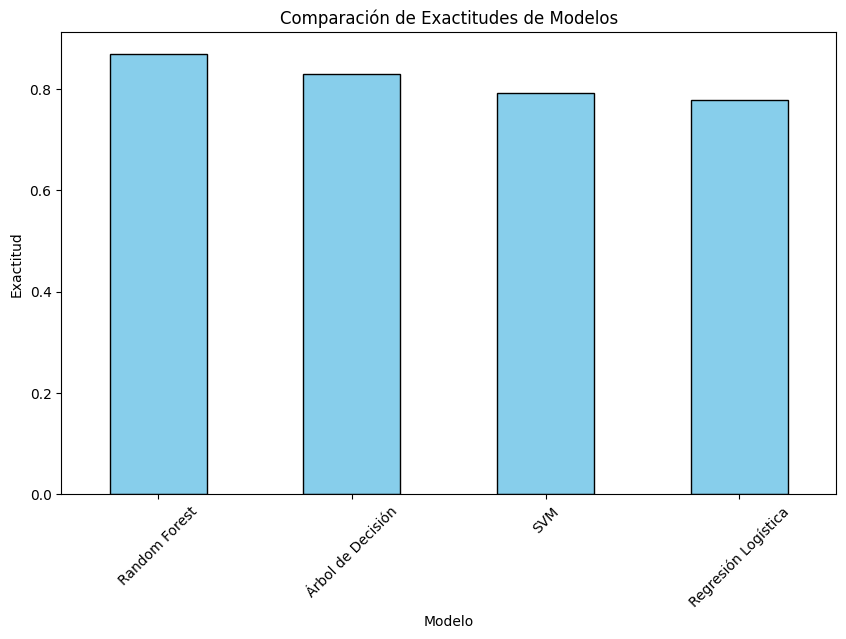

In [32]:
# Selección de variables
variables = ['Departamento', 'Localidad', 'Jurisdiccion', 'Tipo de Siniestro', 'Vehiculo', 'Rol', 'Edad', 'Sexo', 'Fallecido a los Dias', 'Otro vehiculo']
variables = [var for var in variables if var in df.columns]  # Verificar que las columnas existan en el dataset
df = df[variables]

# Convertir columnas categóricas a numéricas
for col in ['Departamento', 'Localidad', 'Jurisdiccion', 'Tipo de Siniestro', 'Vehiculo', 'Rol', 'Sexo', 'Otro vehiculo']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

# Dividir el dataset en conjuntos de entrenamiento y prueba
X = df.drop('Tipo de Siniestro', axis=1)
y = df['Tipo de Siniestro']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balancear el conjunto de entrenamiento con SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Diccionario para almacenar las métricas de los modelos
model_metrics = {}

# Modelo 1: Regresión Logística
model_log = LogisticRegression(max_iter=1000, random_state=42)
model_log.fit(X_train_scaled, y_train_balanced)
y_pred_log = model_log.predict(X_test_scaled)
model_metrics['Regresión Logística'] = {
    'Exactitud': accuracy_score(y_test, y_pred_log),
    'Precisión': precision_score(y_test, y_pred_log, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_log, average='weighted', zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_log, average='weighted', zero_division=0)
}

# Modelo 2: Árbol de Decisión
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_balanced, y_train_balanced)
y_pred_tree = model_tree.predict(X_test)
model_metrics['Árbol de Decisión'] = {
    'Exactitud': accuracy_score(y_test, y_pred_tree),
    'Precisión': precision_score(y_test, y_pred_tree, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_tree, average='weighted', zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_tree, average='weighted', zero_division=0)
}

# Modelo 3: Random Forest
model_forest = RandomForestClassifier(random_state=42, class_weight='balanced')
model_forest.fit(X_train_balanced, y_train_balanced)
y_pred_forest = model_forest.predict(X_test)
model_metrics['Random Forest'] = {
    'Exactitud': accuracy_score(y_test, y_pred_forest),
    'Precisión': precision_score(y_test, y_pred_forest, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_forest, average='weighted', zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_forest, average='weighted', zero_division=0)
}

# Modelo 4: Support Vector Machine (SVM)
model_svm = SVC(random_state=42)
model_svm.fit(X_train_scaled, y_train_balanced)
y_pred_svm = model_svm.predict(X_test_scaled)
model_metrics['SVM'] = {
    'Exactitud': accuracy_score(y_test, y_pred_svm),
    'Precisión': precision_score(y_test, y_pred_svm, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_svm, average='weighted', zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)
}

# Crear tabla de resultados
metrics_df = pd.DataFrame(model_metrics).T
metrics_df = metrics_df.sort_values(by='Exactitud', ascending=False)

print("\nResultados de los modelos:")
print(metrics_df)

# Graficar resultados
metrics_df['Exactitud'].plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Comparación de Exactitudes de Modelos')
plt.ylabel('Exactitud')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()


In [35]:
# Ajuste de hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=3)
grid_search.fit(X_train_balanced, y_train_balanced)

# Evaluar el mejor modelo
best_forest = grid_search.best_estimator_
y_pred_best_forest = best_forest.predict(X_test)
model_metrics['Random Forest (Optimizado)'] = {
    'Exactitud': accuracy_score(y_test, y_pred_best_forest),
    'Precisión': precision_score(y_test, y_pred_best_forest, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_best_forest, average='weighted', zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_best_forest, average='weighted', zero_division=0)
}

# Importancia de características
importances = best_forest.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nImportancia de características:")
print(feature_importance)



Importancia de características:
                Feature  Importance
4                  Edad    0.206713
2              Vehiculo    0.200420
7         Otro vehiculo    0.179482
1             Localidad    0.145880
0          Departamento    0.105583
3                   Rol    0.101015
6  Fallecido a los Dias    0.039737
5                  Sexo    0.021173


# Clusterización:

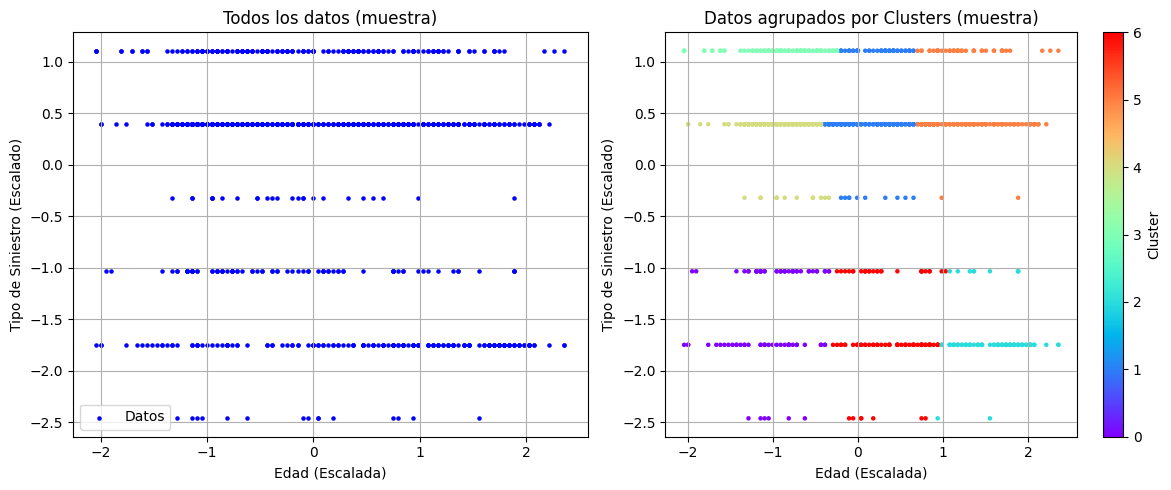

In [26]:
# Preparar los datos
data_cluster = df[['Edad', 'Tipo de Siniestro']].copy()

# Manejar valores faltantes en "Edad"
data_cluster['Edad'] = data_cluster['Edad'].fillna(data_cluster['Edad'].mean())

# Convertir "Tipo de Siniestro" a valores numéricos con codificación de categorías
data_cluster['Tipo de Siniestro'] = data_cluster['Tipo de Siniestro'].astype('category').cat.codes

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Aplicar K-means con 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
data_cluster['Cluster'] = kmeans.fit_predict(data_scaled)

# Crear gráficos con una muestra para evitar problemas de memoria
sample_size = 1000  # Ajustá este valor según tu capacidad
data_sample = data_cluster.sample(n=sample_size, random_state=42)
data_sample_scaled = scaler.transform(data_sample[['Edad', 'Tipo de Siniestro']])

plt.figure(figsize=(12, 5))

# Gráfico de todos los puntos (izquierda)
plt.subplot(1, 2, 1)
plt.scatter(data_sample_scaled[:, 0], data_sample_scaled[:, 1], c='blue', s=5, label='Datos')
plt.title('Todos los datos (muestra)')
plt.xlabel('Edad (Escalada)')
plt.ylabel('Tipo de Siniestro (Escalado)')
plt.grid()
plt.legend()

# Gráfico de clusters diferenciados (derecha)
plt.subplot(1, 2, 2)
scatter = plt.scatter(data_sample_scaled[:, 0], data_sample_scaled[:, 1], c=data_sample['Cluster'], cmap='rainbow', s=5)
plt.colorbar(scatter, label='Cluster')
plt.title('Datos agrupados por Clusters (muestra)')
plt.xlabel('Edad (Escalada)')
plt.ylabel('Tipo de Siniestro (Escalado)')
plt.grid()

plt.tight_layout()
plt.show()